In [ ]:
pip install nltk==3.4.5

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
df=pd.read_csv("flipkart_reviews_dataset.csv")
df.head()

product_id              product_title  rating                summary  \
0  ACCFHCAPHTPCCXZR  Ubon UB-770 Wired Headset       5  Mind-blowing purchase   
1  ACCFHCAPHTPCCXZR  Ubon UB-770 Wired Headset       5                Awesome   
2  ACCFHCAPHTPCCXZR  Ubon UB-770 Wired Headset       5              Wonderful   
3  ACCFHCAPHTPCCXZR  Ubon UB-770 Wired Headset       1        Waste of money!   
4  ACCFHCAPHTPCCXZR  Ubon UB-770 Wired Headset       5  Mind-blowing purchase   

                                              review          location  \
0  It's a nice ear phone from Ubon in affordable ...         Ahmedabad   
1  According to my opinion about this earphone , ...  Bhadrak District   
2  Best quality product. In best price. I love 😍 ...         Berhampur   
3  Dont buy.I bought a pair of these before 1 mon...            Kalyan   
4  Very good product in this price.. sound qualit...              Adra   

            date  upvotes  downvotes  
0  11 months ago      210         33  
1  10 months ago      198         50  
2  11 months ago       20          6  
3   9 months ago        3          0  
4  10 months ago        4          1

In [3]:
df.isnull().sum()

product_id          0
product_title       0
rating              0
summary             0
review              0
location         4424
date                0
upvotes             0
downvotes           0
dtype: int64

In [4]:
reviews=df['review'].str.split("//",n = 4,expand=True)
reviews.head

<bound method NDFrame.head of                                                       0
0     It's a nice ear phone from Ubon in affordable ...
1     According to my opinion about this earphone , ...
2     Best quality product. In best price. I love 😍 ...
3     Dont buy.I bought a pair of these before 1 mon...
4     Very good product in this price.. sound qualit...
...                                                 ...
9551  Wonderful product. Sound quality is really nice👍👌
9552                        Nyc quality in a cheap rate
9553                   This product are charging issues
9554        Good product but buds indicator not working
9555                                      WASTE PRODUCT

[9556 rows x 1 columns]>

In [5]:
df.shape


(9556, 9)

In [6]:
review_df=df['review']

In [7]:
review_df.head()

0    It's a nice ear phone from Ubon in affordable ...
1    According to my opinion about this earphone , ...
2    Best quality product. In best price. I love 😍 ...
3    Dont buy.I bought a pair of these before 1 mon...
4    Very good product in this price.. sound qualit...
Name: review, dtype: object

In [8]:
def remove_punctuation(text):
    no_punct="".join([c for c in text if c not in string.punctuation])
    return no_punct

In [9]:
import string
df['review']=df['review'].apply(lambda x:remove_punctuation(x))
df['review'].head()

0    Its a nice ear phone from Ubon in affordable p...
1    According to my opinion about this earphone  i...
2    Best quality product In best price I love 😍 it...
3    Dont buyI bought a pair of these before 1 mont...
4    Very good product in this price sound quality ...
Name: review, dtype: object

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')


In [11]:
df['review']=df['review'].apply(lambda x:tokenizer.tokenize(str(x)))
df['review'].head(20)

0     [Its, a, nice, ear, phone, from, Ubon, in, aff...
1     [According, to, my, opinion, about, this, earp...
2     [Best, quality, product, In, best, price, I, l...
3     [Dont, buyI, bought, a, pair, of, these, befor...
4     [Very, good, product, in, this, price, sound, ...
5     [Lovely, product, bass, quality, is, super, va...
6                                                [Good]
7                                           [Good, one]
8                                 [Not, good, not, bad]
9     [worked, fine, at, first, But, after, 1month, ...
10                                [most, and, fasility]
11      [Amazing, product, loved, it, worth, of, money]
12                            [product, is, very, good]
13    [these, are, amazing, and, the, sound, quality...
14                                 [Excellent, product]
15    [value, for, money, but, after, 1, month, I, c...
16                                               [nice]
17     [Good, Product, But, Bass, effect, not, s

In [12]:
from nltk.corpus import stopwords

In [13]:
def remove_stopwords(text):
    words="".join([c for c in text if c not in stopwords.words('english')])
    return words

In [14]:
df['review']=df['review'].apply(lambda x: remove_stopwords(str(x)))
df['review'].head(10)

0    ['I', '', 'nce', 'er', 'phne', 'fr', 'Ubn', 'n...
1    ['Accrng', '', '', 'pnn', 'bu', 'h', 'erphne',...
2    ['Be', 'qul', 'pruc', 'In', 'be', 'prce', 'I',...
3    ['Dn', 'buI', 'bugh', '', 'pr', 'f', 'hee', 'b...
4    ['Ver', 'g', 'pruc', 'n', 'h', 'prce', 'un', '...
5    ['Lvel', 'pruc', 'b', 'qul', '', 'uper', 'vlue...
6                                                ['G']
7                                          ['G', 'ne']
8                                 ['N', 'g', 'n', 'b']
9    ['wrke', 'fne', '', 'fr', 'Bu', 'fer', '1nh', ...
Name: review, dtype: object

In [15]:
import nltk

In [17]:
#nltk.download('all')

In [ ]:
nltk.download('wordnet')

In [16]:
from nltk.stem import WordNetLemmatizer

In [17]:
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text=[lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [18]:
df['review']=df['review'].apply(lambda x: word_lemmatizer(x))
df['review'].head(10)

0    [[, ', I, ', ,,  , ', ', ,,  , ', n, c, e, ', ...
1    [[, ', A, c, c, r, n, g, ', ,,  , ', ', ,,  , ...
2    [[, ', B, e, ', ,,  , ', q, u, l, ', ,,  , ', ...
3    [[, ', D, n, ', ,,  , ', b, u, I, ', ,,  , ', ...
4    [[, ', V, e, r, ', ,,  , ', g, ', ,,  , ', p, ...
5    [[, ', L, v, e, l, ', ,,  , ', p, r, u, c, ', ...
6                                      [[, ', G, ', ]]
7                    [[, ', G, ', ,,  , ', n, e, ', ]]
8    [[, ', N, ', ,,  , ', g, ', ,,  , ', n, ', ,, ...
9    [[, ', w, r, k, e, ', ,,  , ', f, n, e, ', ,, ...
Name: review, dtype: object

In [21]:
from nltk.stem.porter import PorterStemmer

In [22]:
stemmer=PorterStemmer()

In [23]:
def word_stemmer(text):
    stem_text=" ".join([stemmer.stem(i)  for i in text ])
    return stem_text

In [24]:
df['review']=df['review'].apply(lambda x: word_stemmer(str(x)))
df['review'].head(10)

0    [ ' [ ' ,   " ' " ,   ' I ' ,   " ' " ,   ' , ...
1    [ ' [ ' ,   " ' " ,   ' A ' ,   ' c ' ,   ' c ...
2    [ ' [ ' ,   " ' " ,   ' B ' ,   ' e ' ,   " ' ...
3    [ ' [ ' ,   " ' " ,   ' D ' ,   ' n ' ,   " ' ...
4    [ ' [ ' ,   " ' " ,   ' V ' ,   ' e ' ,   ' r ...
5    [ ' [ ' ,   " ' " ,   ' L ' ,   ' v ' ,   ' e ...
6    [ ' [ ' ,   " ' " ,   ' G ' ,   " ' " ,   ' ] ' ]
7    [ ' [ ' ,   " ' " ,   ' G ' ,   " ' " ,   ' , ...
8    [ ' [ ' ,   " ' " ,   ' N ' ,   " ' " ,   ' , ...
9    [ ' [ ' ,   " ' " ,   ' w ' ,   ' r ' ,   ' k ...
Name: review, dtype: object

In [19]:
df.describe()

rating      upvotes    downvotes
count  9556.000000  9556.000000  9556.000000
mean      3.922771     7.492779     1.913876
std       1.465351    72.294489    17.165949
min       1.000000     0.000000     0.000000
25%       3.000000     0.000000     0.000000
50%       5.000000     0.000000     0.000000
75%       5.000000     1.000000     0.000000
max       5.000000  2081.000000   481.000000

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

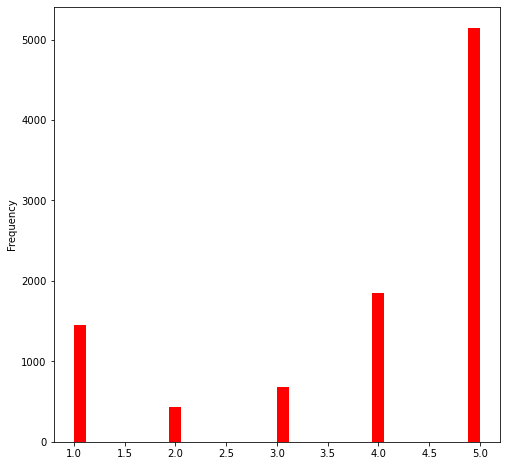

In [21]:
df.rating.plot(kind="hist",color="red",figsize=(8,8),bins=34)
plt.show()

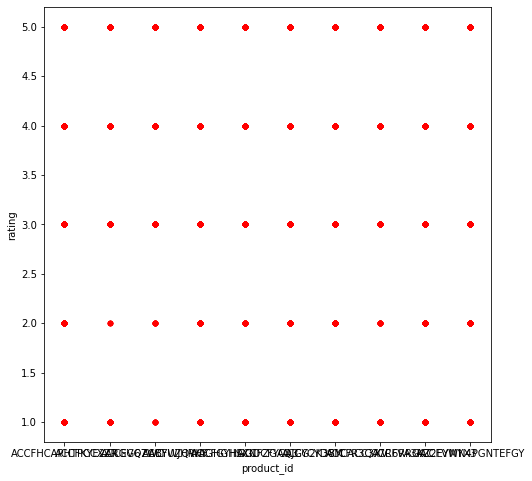

In [22]:

df.plot(kind="scatter",x="product_id",y="rating",color="red",figsize=(8,8))
plt.show()

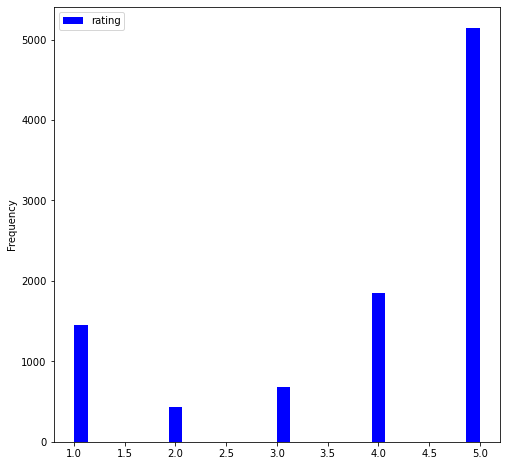

In [23]:
df[["rating"]].plot(kind="hist",color="blue",figsize=(8,8),bins=30)
plt.show()

In [24]:
 df.drop(["date"],axis=1)

product_id                    product_title  rating  \
0     ACCFHCAPHTPCCXZR        Ubon UB-770 Wired Headset       5   
1     ACCFHCAPHTPCCXZR        Ubon UB-770 Wired Headset       5   
2     ACCFHCAPHTPCCXZR        Ubon UB-770 Wired Headset       5   
3     ACCFHCAPHTPCCXZR        Ubon UB-770 Wired Headset       1   
4     ACCFHCAPHTPCCXZR        Ubon UB-770 Wired Headset       5   
...                ...                              ...     ...   
9551  ACCFVWN4PGNTEFGY  realme Buds Q Bluetooth Headset       4   
9552  ACCFVWN4PGNTEFGY  realme Buds Q Bluetooth Headset       5   
9553  ACCFVWN4PGNTEFGY  realme Buds Q Bluetooth Headset       1   
9554  ACCFVWN4PGNTEFGY  realme Buds Q Bluetooth Headset       3   
9555  ACCFVWN4PGNTEFGY  realme Buds Q Bluetooth Headset       1   

                    summary  \
0     Mind-blowing purchase   
1                   Awesome   
2                 Wonderful   
3           Waste of money!   
4     Mind-blowing purchase   
...                     ...   
9551   Good quality product   
9552       Perfect product!   
9553        Waste of money!   
9554                   Fair   
9555        Waste of money!   

                                                 review          location  \
0     [[, ', I, ', ,,  , ', ', ,,  , ', n, c, e, ', ...         Ahmedabad   
1     [[, ', A, c, c, r, n, g, ', ,,  , ', ', ,,  , ...  Bhadrak District   
2     [[, ', B, e, ', ,,  , ', q, u, l, ', ,,  , ', ...         Berhampur   
3     [[, ', D, n, ', ,,  , ', b, u, I, ', ,,  , ', ...            Kalyan   
4     [[, ', V, e, r, ', ,,  , ', g, ', ,,  , ', p, ...              Adra   
...                                                 ...               ...   
9551  [[, ', W, n, e, r, f, u, l, ', ,,  , ', p, r, ...               NaN   
9552  [[, ', N, c, ', ,,  , ', q, u, l, ', ,,  , ', ...               NaN   
9553  [[, ', T, h, ', ,,  , ', p, r, u, c, ', ,,  , ...               NaN   
9554  [[, ', G, ', ,,  , ', p, r, u, c, ', ,,  , ', ...               NaN   
9555  [[, ', W, A, S, T, E, ', ,,  , ', P, R, O, D, ...               NaN   

      upvotes  downvotes  
0         210         33  
1         198         50  
2          20          6  
3           3          0  
4           4          1  
...       ...        ...  
9551        0          0  
9552        0          0  
9553        0          0  
9554        0          0  
9555        0          0  

[9556 rows x 8 columns]

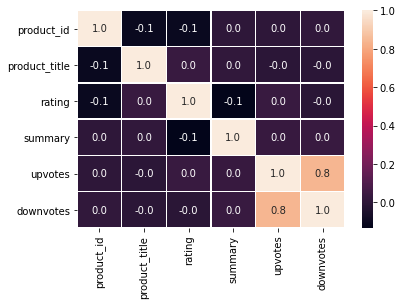

In [38]:
ax = sns.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

In [68]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name].astype(str))


In [71]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
X = df.drop(["rating"],axis=1)
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [72]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
neigh = KNeighborsRegressor(n_neighbors=1,metric='chebyshev')
neigh.fit(X_train_scaled, y_train)
knn_pred = neigh.predict(X_test_scaled)
r2_score(y_test, knn_pred)

-0.4457817556513406

In [75]:
mean_squared_error(y_test, knn_pred)

3.207534007673526

Text(0.5, 0, 'Pred')

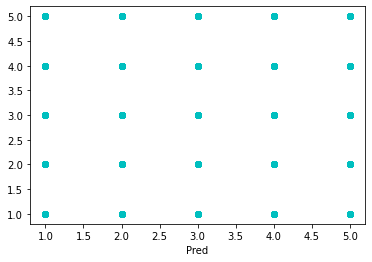

In [76]:
plt.scatter(x=y_test,y=knn_pred,color='c')
plt.xlabel("Pred")